<a href="https://colab.research.google.com/github/7heOwenMa/PortfolioProjects/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

!mkdir /root/.kaggle
!cp 'gdrive/MyDrive/kaggle.json' /root/.kaggle

!kaggle competitions download -c titanic

Mounted at /content/gdrive
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.21MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 27.0MB/s]


In [ ]:
!ls

gdrive	gender_submission.csv  sample_data  test.csv  train.csv


In [ ]:
import pandas as pd

ds = pd.read_csv("train.csv")

ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Q
### Is female survived more over male in percentage?

In [ ]:
ds_male = ds.loc[ds['Sex'] == 'male']

ds_female = ds.loc[ds['Sex'] == 'female']


In [ ]:
ds_male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
ds_female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
total_male_survived = sum(ds_male["Survived"])

total_female_survived = sum(ds_female["Survived"])

In [ ]:
percent_male_survived = total_male_survived / ds_male.shape[0]

percent_female_survived = total_female_survived / ds_female.shape[0]

In [ ]:
percent_female_survived

0.7420382165605095

In [ ]:
percent_male_survived

0.18890814558058924

# Q

### check whether pclass effect the survival rate

In [ ]:
ds_firstClass = ds.loc[ds['Pclass'] == 1]
ds_secondClass = ds.loc[ds['Pclass'] == 2]
ds_thirdClass = ds.loc[ds['Pclass'] == 3]

In [ ]:
total_first_survived = sum(ds_firstClass["Survived"])
total_second_survived = sum(ds_secondClass["Survived"])
total_third_survived = sum(ds_thirdClass["Survived"])

In [ ]:
percent_first_survived = total_first_survived / ds_firstClass.shape[0]
percent_first_survived

0.6296296296296297

In [ ]:
percent_second_survived = total_second_survived / ds_secondClass.shape[0]
percent_second_survived

0.47282608695652173

In [ ]:
percent_third_survived = total_third_survived / ds_thirdClass.shape[0]
percent_third_survived

0.24236252545824846

In [ ]:
ds["Age"].isna().sum()


177

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


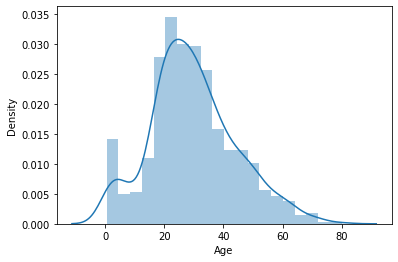

In [ ]:
import seaborn as sn

sn.distplot(ds["Age"])

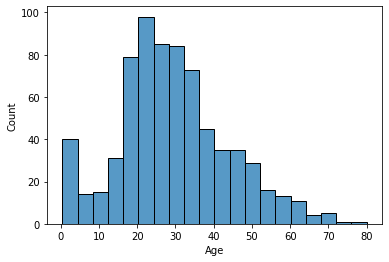

In [ ]:
sn.histplot(ds["Age"])

In [ ]:
import numpy as np

np.median(ds["Age"].dropna())

28.0

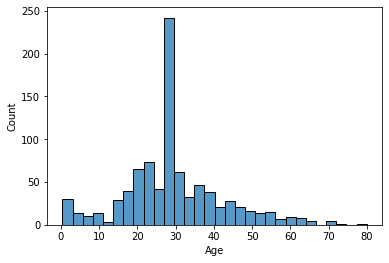

In [ ]:
ds["Age"] = ds["Age"].fillna(ds["Age"].median())

sn.histplot(ds["Age"])


In [ ]:
ds = ds.drop(["Cabin"], axis=1)


In [ ]:
ds = ds[ds['Embarked'].notna()]

ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
ds["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
def convert_S_to_01(value):
  return 1 if value == 'S' else 0

def convert_C_to_01(value):
  return 1 if value == 'C' else 0

def convert_Q_to_01(value):
  return 1 if value == 'Q' else 0

In [ ]:
ds['Embarked_S'] = ds['Embarked'].apply(convert_S_to_01)

ds['Embarked_C'] = ds['Embarked'].apply(convert_C_to_01)

ds['Embarked_Q'] = ds['Embarked'].apply(convert_Q_to_01)



In [ ]:
ds = ds.drop(["PassengerId"], axis=1)

ds = ds.drop(["Name","Ticket"], axis=1)

ds = ds.drop(["Embarked"], axis=1)

ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,0,3,male,22.0,1,0,7.2500,1,0,0
1,1,1,female,38.0,1,0,71.2833,0,1,0
2,1,3,female,26.0,0,0,7.9250,1,0,0
3,1,1,female,35.0,1,0,53.1000,1,0,0
4,0,3,male,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1,0,0
887,1,1,female,19.0,0,0,30.0000,1,0,0
888,0,3,female,28.0,1,2,23.4500,1,0,0
889,1,1,male,26.0,0,0,30.0000,0,1,0


# We are utilizing logistic regression to classified each passager's surving status

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

y_train = ds["Survived"]
ds = ds.drop(["Survived"], axis = 1)
ds['Sex'] = ds['Sex'].apply(lambda x: 1 if x == 'male' else 0)
x_train = ds


In [ ]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.coef_

array([[-0.99149442, -2.71998458, -0.03583623, -0.32587873, -0.0834623 ,
         0.00273539,  0.79049006,  1.38454431,  1.03948693]])

### Based on our regression model, we find out that the column of Sex has the highest correlation with Surviving status, and also Pclass, age and Sibsp are highly correlated with Surviving status. 

In [ ]:
x_test = pd.read_csv("test.csv")

x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
x_test['Embarked_S'] = x_test['Embarked'].apply(convert_S_to_01)

x_test['Embarked_C'] = x_test['Embarked'].apply(convert_C_to_01)

x_test['Embarked_Q'] = x_test['Embarked'].apply(convert_Q_to_01)

In [ ]:
x_test = x_test.drop(["PassengerId","Name", "Cabin", "Embarked", "Ticket"], axis = 1)


In [ ]:
x_test['Sex'] = x_test['Sex'].apply(lambda x: 1 if x == 'male' else 0)

x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,3,1,34.5,0,0,7.8292,0,0,1
1,3,0,47.0,1,0,7.0000,1,0,0
2,2,1,62.0,0,0,9.6875,0,0,1
3,3,1,27.0,0,0,8.6625,1,0,0
4,3,0,22.0,1,1,12.2875,1,0,0
...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,1,0,0
414,1,0,39.0,0,0,108.9000,0,1,0
415,3,1,38.5,0,0,7.2500,1,0,0
416,3,1,NaN,0,0,8.0500,1,0,0


In [ ]:
x_test.isna().sum()


Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked_S     0
Embarked_C     0
Embarked_Q     0
dtype: int64

In [ ]:
x_test['Age'] = x_test["Age"].fillna(x_test["Age"].mean())
x_test["Fare"] = x_test["Fare"].fillna(x_test["Fare"].mean())

x_test.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_S    0
Embarked_C    0
Embarked_Q    0
dtype: int64

In [ ]:
lr.predict(x_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### We are spliting our training dataset into two dataset x and y 


In [ ]:
from sklearn.model_selection import train_test_split

x_tr, x_t, y_tr, y_t = train_test_split(x_train, y_train)


In [ ]:
lr = LogisticRegression()

lr.fit(x_tr, y_tr)

lr.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[-0.81463851, -2.63100192, -0.03305565, -0.34508088, -0.13388753,
         0.00427522,  0.72950276,  1.51619711,  0.59544677]])

In [ ]:
lr2 = LogisticRegression()

lr2.fit(x_t, y_t)

lr2.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[-1.06359162, -2.44401561, -0.04218734, -0.23728055, -0.29649177,
         0.00386958,  0.83305141,  0.71545048,  1.09591049]])

In [ ]:
lr.predict(x_t)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0])

In [ ]:
result_data = pd.DataFrame([lr.predict(x_t), y_t] ).T

result_data

,0,1
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
218,0,0
219,1,0
220,0,0
221,1,1


In [ ]:
(result_data.loc[:, 0] == result_data.loc[:, 1]).sum()/ 223 

0.8116591928251121

In [ ]:
from sklearn.metrics import confusion_matrix

c_m = confusion_matrix(y_t, lr.predict(x_t))

array([[124,  21],
       [ 21,  57]])

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_tr, y_tr)
preds = rf.predict(x_t)
confusion_matrix(preds, y_t)

array([[123,  19],
       [ 22,  59]])

In [ ]:
rf = LogisticRegression()
rf.fit(x_tr, y_tr)
preds = rf.predict(x_t)
confusion_matrix(preds, y_t)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[124,  21],
       [ 21,  57]])